<a href="https://colab.research.google.com/github/AkashBhardwaj9078/ML-applications/blob/main/feature_selection_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv("/content/sales.csv",encoding='latin')

In [ ]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [ ]:
df.drop(columns=['Status','unnamed1'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
df['Amount'].fillna(np.mean(df['Amount']),inplace=True)

In [ ]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [ ]:
for i in df.columns:
  print(df[i].dtype,i)
  print(df[i].nunique())
  print(df[i].unique())
  print("-"*100)

int64 User_ID
3755
[1002903 1000732 1001990 ... 1001542 1004378 1005258]
----------------------------------------------------------------------------------------------------
object Cust_name
1250
['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
----------------------------------------------------------------------------------------------------
object Product_ID
2351
['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
----------------------------------------------------------------------------------------------------
object Gender
2
['F' 'M']
----------------------------------------------------------------------------------------------------
object Age Group
7
['26-35' '0-17' '18-25' '55+' '46-50' '51-55' '36-45']
----------------------------------------------------------------------------------------------------
int64 Age
81
[28 35 16 25 61 26 34 20 46 24 48 29 54 19 30 53 83 33 40 39 32 36 55 27
 72 45 43 47 22 52 18 21 38 37 23 49 42 50 31 

<Axes: ylabel='Age Group'>

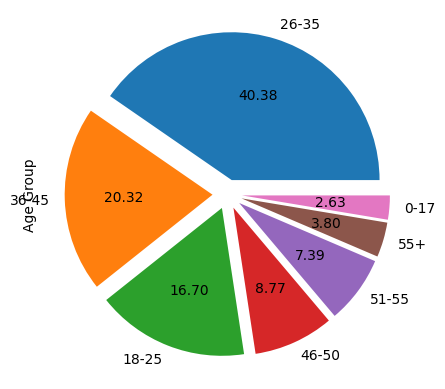

In [ ]:
df["Age Group"].value_counts().plot(kind='pie',autopct="%0.2f",explode=[0.1]*7)

Text(0.5, 1.0, 'Composition of various Age-Groups')

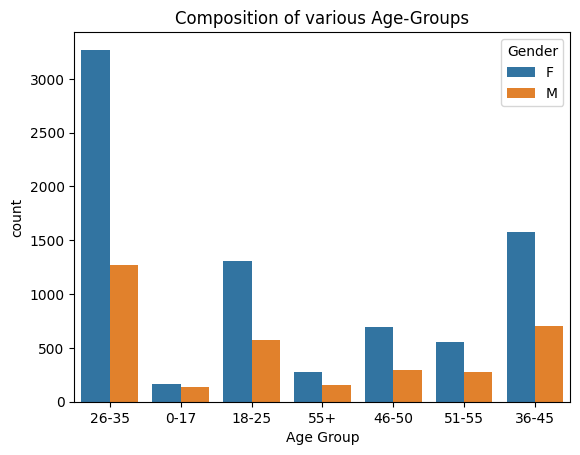

In [ ]:
sns.countplot(x=df['Age Group'],hue=df['Gender'],)
plt.title("Composition of various Age-Groups")

<ipython-input-14-ab7bbe026618>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']=='M']['Age'],label="Male")
<ipython-input-14-ab7bbe026618>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']=='F']['Age'],label="Female")


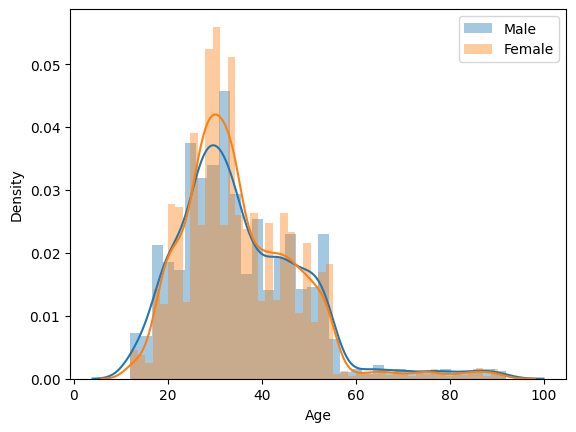

In [ ]:
sns.distplot(df[df['Gender']=='M']['Age'],label="Male")
sns.distplot(df[df['Gender']=='F']['Age'],label="Female")
plt.legend()

In [ ]:
df.groupby(['Gender','Marital_Status']).sum()["Amount"].reset_index()

<ipython-input-15-8df05ff0a0e7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Gender','Marital_Status']).sum()["Amount"].reset_index()


,Gender,Marital_Status,Amount
0,F,0,4.381501e+07
1,F,1,3.061538e+07
2,M,0,1.834819e+07
3,M,1,1.358399e+07


<Axes: >

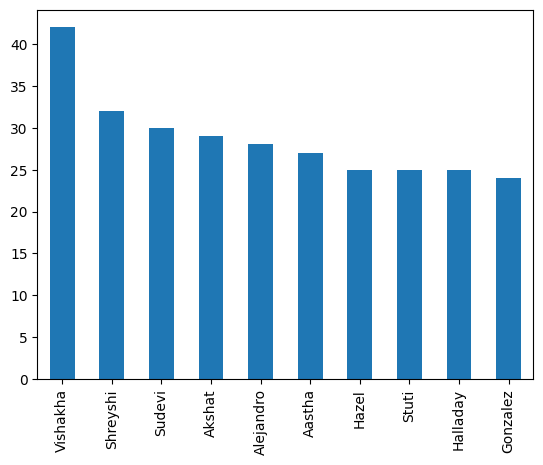

In [ ]:
df['Cust_name'].value_counts()[:10].plot(kind='bar')

In [ ]:
df.groupby('Zone').sum()[['Amount','Orders']].reset_index()

<ipython-input-17-384bf09696a6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Zone').sum()[['Amount','Orders']].reset_index()


,Zone,Amount,Orders
0,Central,4.166705e+07,10640
1,Eastern,7.049213e+06,2015
2,Northern,1.261875e+07,3727
3,Southern,2.662558e+07,6744
4,Western,1.840199e+07,4881


In [ ]:
df.groupby(['Zone','State']).sum().sort_values("Amount",ascending=False)[['Orders',"Amount"]].reset_index()

<ipython-input-18-a9f27ca1d13c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Zone','State']).sum().sort_values("Amount",ascending=False)[['Orders',"Amount"]].reset_index()


,Zone,State,Orders,Amount
0,Central,Uttar Pradesh,4813,1.939388e+07
1,Western,Maharashtra,3811,1.443700e+07
2,Southern,Karnataka,3241,1.353299e+07
3,Central,Delhi,2744,1.163218e+07
4,Central,Madhya Pradesh,2259,8.120049e+06
5,Southern,Andhra Pradesh,2054,8.046601e+06
6,Northern,Himachal Pradesh,1568,4.963368e+06
7,Northern,Haryana,1109,4.220175e+06
8,Eastern,Bihar,1062,4.022757e+06
9,Western,Gujarat,1070,3.964989e+06


In [ ]:
df.groupby(["State","Occupation"]).sum().sort_values("Amount",ascending=False)[['Amount',"Orders"]].reset_index()

<ipython-input-19-aff1e9bc56d9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["State","Occupation"]).sum().sort_values("Amount",ascending=False)[['Amount',"Orders"]].reset_index()


,State,Occupation,Amount,Orders
0,Uttar Pradesh,IT Sector,2.691511e+06,688
1,Uttar Pradesh,Aviation,2.474993e+06,588
2,Uttar Pradesh,Healthcare,2.427990e+06,606
3,Uttar Pradesh,Banking,2.019396e+06,460
4,Maharashtra,Healthcare,1.974286e+06,490
...,...,...,...,...
235,Punjab,Lawyer,3.972800e+04,12
236,Telangana,Chemical,3.371900e+04,11
237,Rajasthan,Agriculture,2.541600e+04,10
238,Punjab,Agriculture,1.724500e+04,9


<Axes: xlabel='Occupation', ylabel='Amount'>

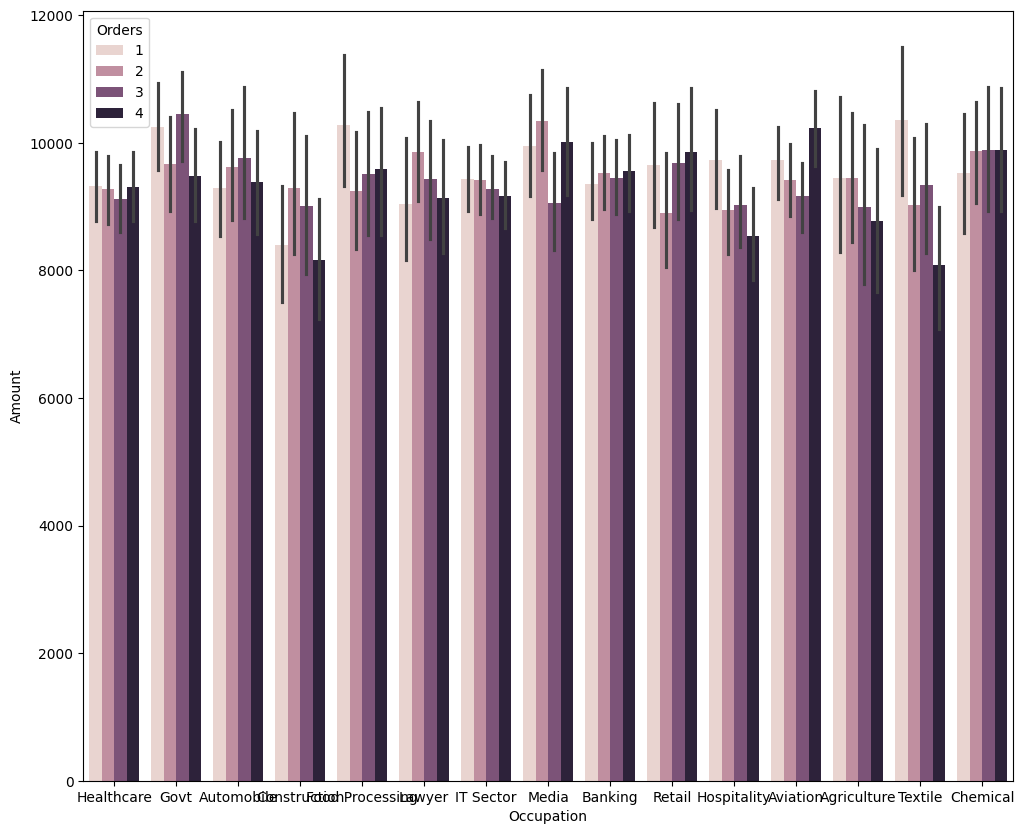

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=df['Occupation'],y=df["Amount"],hue=df["Orders"])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

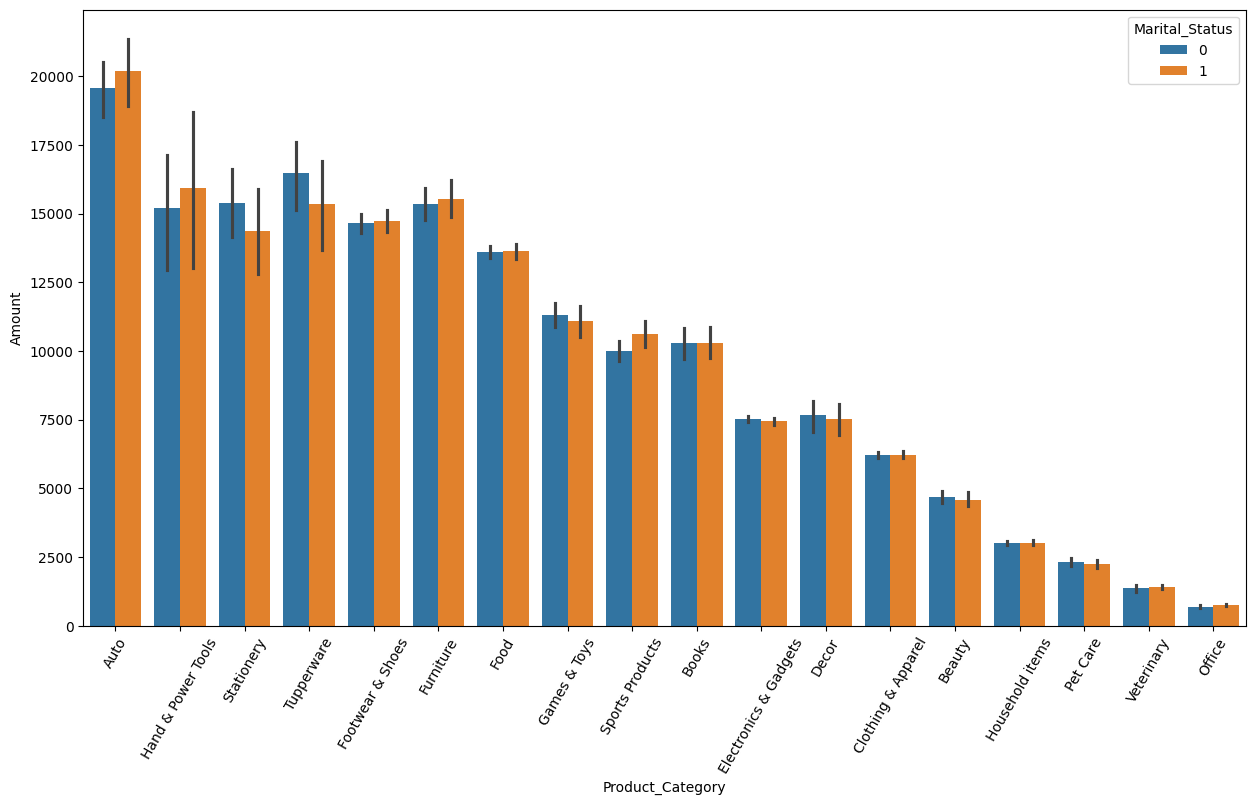

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=df["Product_Category"],y=df["Amount"],hue=df['Marital_Status'])
plt.xticks(rotation=60)

<Axes: xlabel='Product_Category', ylabel='Occupation'>

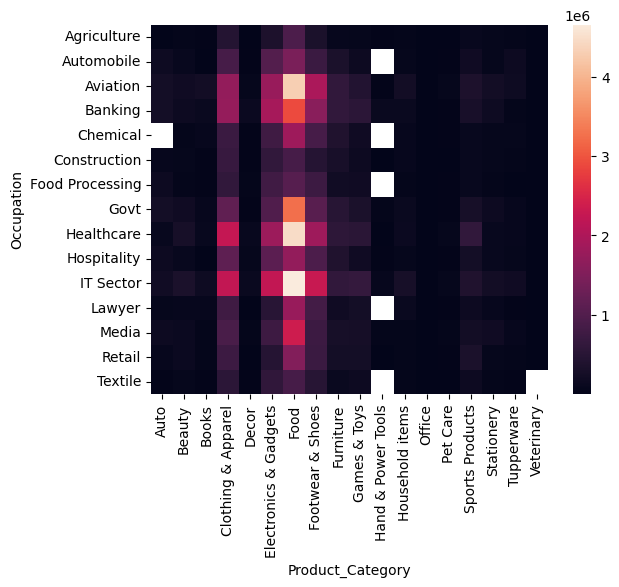

In [ ]:
sns.heatmap(df.pivot_table(index='Occupation',columns='Product_Category',aggfunc='sum',values='Amount'))

<Axes: xlabel='State', ylabel='Amount'>

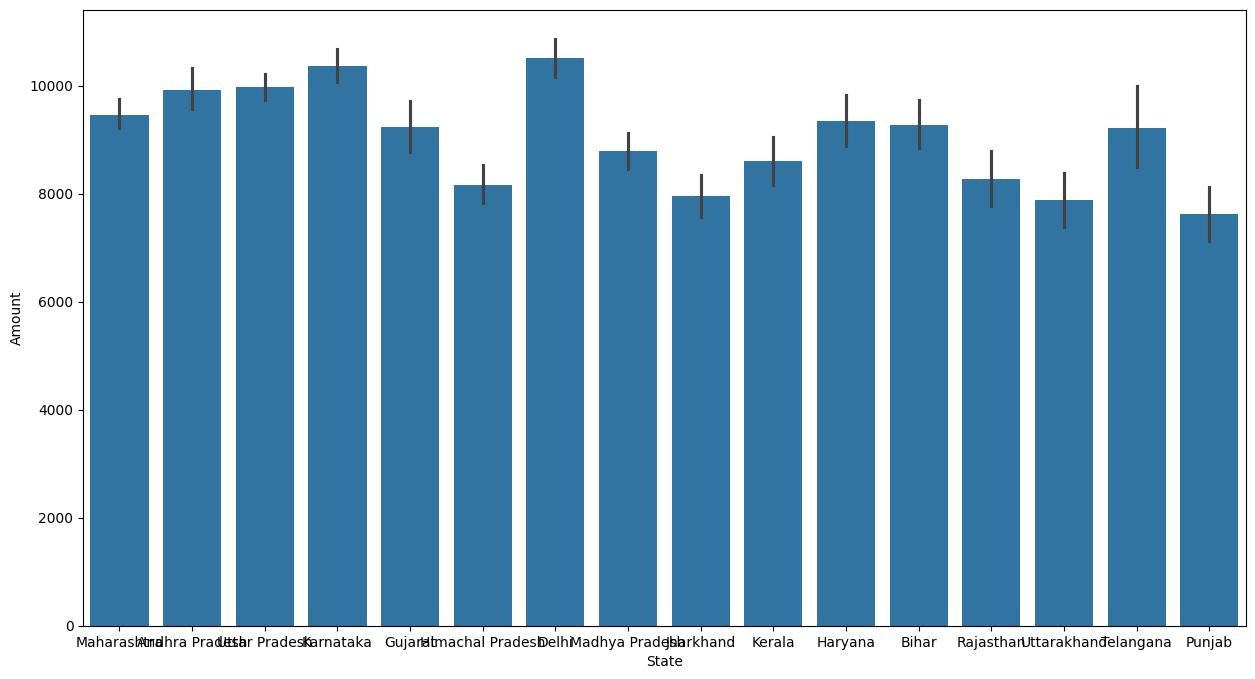

In [ ]:
plt.figure(figsize=(15,8,))
sns.barplot(x=df["State"],y=df["Amount"])

In [ ]:
df.drop(columns=['User_ID',"Cust_name","Product_ID","Age Group","State"],inplace=True)

In [ ]:
x=df[['Occupation','Product_Category']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Occupation']=LabelEncoder().fit_transform(df['Occupation'])

In [ ]:


df['Product_Category']=LabelEncoder().fit_transform(df['Product_Category'])


In [ ]:
df['Zone']=LabelEncoder().fit_transform(df['Zone'])

In [ ]:
df["Gender"]=df["Gender"].replace({'F':0,'M':1})

In [ ]:
df.head()

,Gender,Age,Marital_Status,Zone,Occupation,Product_Category,Orders,Amount
0,0,28,0,4,8,0,1,23952.0
1,0,35,1,3,7,0,3,23934.0
2,0,35,1,0,1,0,3,23924.0
3,1,16,0,3,5,0,2,23912.0
4,1,28,1,4,6,0,2,23877.0


In [ ]:
x=df.drop(columns=['Amount'])
y=df['Amount']

In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression

In [ ]:
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.linear_model import LinearRegression



In [ ]:
lr=LinearRegression()


In [ ]:
xtr,xts,ytr,yts=train_test_split(x,y,random_state=0,test_size=0.3)


In [ ]:
print("test_input_shape :",xts.shape)
print("train_input_shape :",xtr.shape)
print("test_output_shape :",yts.shape)
print("train_output_shape :",ytr.shape)

test_input_shape : (3376, 7)
train_input_shape : (7875, 7)
test_output_shape : (3376,)
train_output_shape : (7875,)


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
lr.fit(xtr,ytr)
print("training score:",lr.score(xtr,ytr))
pred=lr.predict(xts)
print("LinearRegression r2_score",r2_score(yts,pred))
print("LinearRegression RMS:",np.sqrt(mean_squared_error(yts,pred)))

training score: 0.009496104864855526
LinearRegression r2_score 0.012675909231314897
LinearRegression RMS: 5117.005259388316


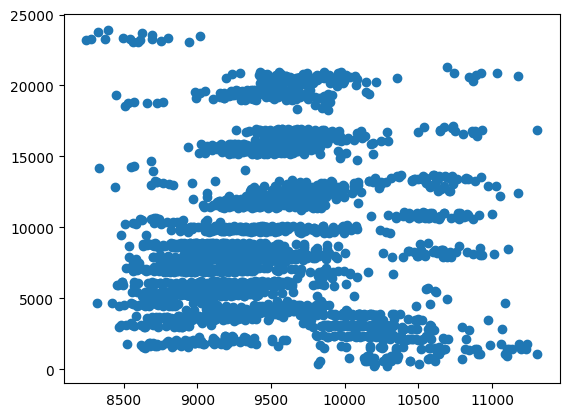

In [ ]:
plt.scatter(pred,yts)

In [ ]:
# prompt: cross_val_score with difrerent scorings

cross_val_scores = cross_val_score(estimator=lr, X=x, y=y, cv=10, scoring='neg_mean_squared_error')

print("Cross-Validation MSE scores:\n", -cross_val_scores)
print("Cross-Validation mean RMSE:\n",np.sqrt(np.mean(-cross_val_scores)))

Cross-Validation MSE scores:
 [1.26662021e+08 5.13428390e+07 1.56833128e+07 2.56827182e+06
 1.04721904e+06 2.68873911e+06 6.95832832e+06 1.71429040e+07
 3.58620490e+07 1.11810765e+08]
Cross-Validation mean RMSE:
 6097.265358551295


In [ ]:
k_best_rms_scores=[]

In [ ]:
for i in range(7):
  x_new = SelectKBest(f_regression, k=i+1).fit_transform(x, y)
  xtr,xts,ytr,yts=train_test_split(x,y,random_state=0,test_size=0.3)
  lr.fit(xtr,ytr)

  pred=lr.predict(xts)
  k_best_rms_scores.append(np.sqrt(mean_squared_error(pred,yts)))



<BarContainer object of 7 artists>

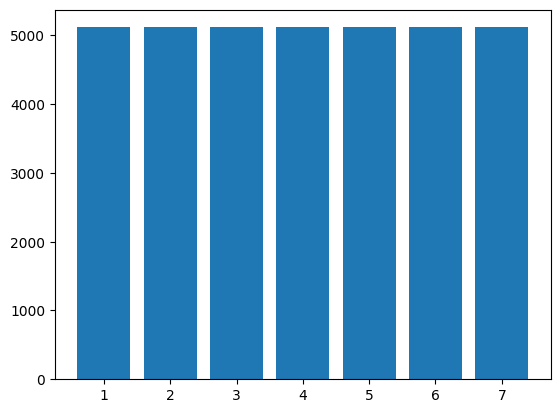

In [ ]:
plt.bar(np.arange(7)+1,k_best_rms_scores)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
